#  ES 335 - Prerequsite Test Submission

**Roll Number:** 24250067 <br> 
**Program:** MTech in AI<br>
**Year:** Year I<br>

**Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.** 

**Solution :**

Consider a matrix A(n,k) and matrix B(k,m).
Matrix multiplication i.e. A$\times$B, produces a matrix of order (n,m), say C. Here, every element of $i^{th}$ row and $j^{th}$ column of C gets produced when all the $i^{th}$ row elements of the matrix A multiply with their corresponding $j^{th}$ column elements of the matrix B and those products are subsiquently added. That is:
$$\Large{c_{ij}=\sum_{x=1}^{k}a_{ix}b_{xj}}$$

Thus to produce one element through matrix multiplication, **$k$** additions and **$k$** multiplications are required. Since the matrix multiplication would produce **n$\times$m** such elements, the total number of additions and multplications needed are same and is eqaul to  **n$\times$m$\times$k**.

**Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?** 

**Solution:** <br>
**Method 1: By using Lists**

In [3]:
# Multiplication of Matrices

#User Input of matrices
n=int(input("Input the number of rows of 1st matrix:"))
k=int(input("Input the number of columns of 1st matrix:"))
print("For effective matrix multiplication,number of columns of 1st matrix and the number of rows of second matrix must be",k)
m=int(input("Input the number of columns of 2nd matrix:"))
A=[]
B=[]

Input the number of rows of 1st matrix:1
Input the number of columns of 1st matrix:2
For effective matrix multiplication,number of columns of 1st matrix and the number of rows of second matrix must be 2
Input the number of columns of 2nd matrix:3


In [4]:
print("Input first matrix:")
for i in range(n):
    print("Input the elements of row:",i+1)
    row=[]
    for j in range(k):
        row.append(int(input()))
    A.append(row)

print("Input Second matrix:")
for i in range(k):
    print("Input the elements of row:",i+1)
    row=[]
    for j in range(m):
        row.append(int(input()))
    B.append(row)

Input first matrix:
Input the elements of row: 1
1
2
Input Second matrix:
Input the elements of row: 1
3
6
1
Input the elements of row: 2
4
7
1


In [5]:
print(A)
print(B)

[[1, 2]]
[[3, 6, 1], [4, 7, 1]]


In [20]:
from timeit import default_timer as timer

#Matrix Multiplication
C=[]
start_time = timer()
def matmulbylist(A,B):
    for i in range(n):
        row=[]
        for j in range(m):
            Sum=0
            for x in range(k):
                Sum+=A[i][x]*B[x][j] #Matrix getting multiplied
            row.append(Sum)
        C.append(row)
    return C

C=matmulbylist(A,B)
end_time = timer()

time_elapsed_without_numpy = end_time - start_time

print("Execution time for Matrix multiplication without numpy is:",time_elapsed_without_numpy)


Execution time for Matrix multiplication without numpy is: 0.0001700999855529517


In [21]:
C

[[11, 20, 3]]

**Method 2: By using numpy**

In [19]:
import numpy as np
#start2=time.time()
A_ar=np.array(A)
B_ar=np.array(B)
start_timer = timer()
C_ar=np.dot(A,B)
end_time = timer()
C_ar
time_elapsed_with_numpy = end_time - start_time
#end2=time.time()
print("Execution time for Matrix multiplication by numpy is:",time_elapsed_with_numpy)

if time_elapsed_with_numpy < time_elapsed_without_numpy:
    print('Using Numpy makes the execution faster!')
else:
    print('Using Numpy slows the execution!')

Execution time for Matrix multiplication by numpy is: 90.67070340001374
Using Numpy slows the execution!


**Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?** 

In [9]:
import numpy as np

def median_first_method(A):
    def find_max(A):
        max_val = A[0]
        for val in A[1:]:
            if val > max_val:
                max_val = val
        return max_val

    sorted_list = []
    temp_list = A[:]
    
    while temp_list:
        max_val = find_max(temp_list)
        sorted_list.append(max_val)
        temp_list.remove(max_val)
    
    n = len(sorted_list)
    if n % 2 == 1:
        return sorted_list[n // 2]
    else:
        mid1 = sorted_list[n // 2 - 1]
        mid2 = sorted_list[n // 2]
        return (mid1 + mid2) / 2

A = [1, 5, 7, 8, 12, 35, 6, 0, 3, 7, 9, 23, 22, 4, 90]


def median_efficient(A):
    sorted_list = sorted(A)
    n = len(A)
    if n % 2 == 1:
        
        return sorted_list[n // 2]
    else:
        mid1 = sorted_list[n // 2 - 1]
        mid2 = sorted_list[n // 2]
        return (mid1 + mid2) / 2
def median_usingnp(A):
    return np.median(A)

import timeit

def test_1 ():
    return median_first_method (A[:])
def test_2 ():
    return median_efficient(A[:])
def test_3 ():
    return median_usingnp(A[:])
time_1 = timeit.timeit(test_1, number=1000)
time_2 = timeit.timeit(test_2, number=1000)
time_3 = timeit.timeit(test_3, number=1000)

print(f"Time for first method: {time_1:.6f} seconds")
print(f"Time for second method: {time_2:.6f} seconds")
print(f"Time for numpy method: {time_3:.6f} seconds")

Time for first method: 0.045682 seconds
Time for second method: 0.003450 seconds
Time for numpy method: 0.116888 seconds


**Q4. What is the gradient of the following function with respect to x and y?** <br>

**$\Large{x^2y + y^3sin(x)}$**

**Solution:** <br>
Gradient $\nabla$ of a function $f(x,y)$ is given by:
$$\nabla f(x, y) = \frac{\partial f}{\partial x} \hat{i} + \frac{\partial f}{\partial y} \hat{j}$$ where $\frac{\partial f}{\partial x}$ is the partial derivative of the function wrt $x$ and $\frac{\partial f}{\partial y}$ is the partial derivative of the function wrt $y$. <br>
Given function is: **$x^2y + y^3sin(x)$** <br>
Thus it's gradient is given by: <br>$\nabla f(x, y) = (2xy+ y^3cos(x))\hat{i} + (x^2+2y^2sin(x))\hat{j}$

**Q5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y** 

**Solution:**

In [113]:
pip install jax

Note: you may need to restart the kernel to use updated packages.


In [2]:
import jax
import numpy as np
import jax.numpy as jnp
import math as m
def fn(x,y):
    return ((x**2)*y+(y**3)*jnp.sin(x))
grad_f=jax.grad(fn)
#creating random x and y values
x=np.random.randn()
y=np.random.randn()
grad_val=grad_f(x,y)
print(grad_val)

0.23235118


**Q6. Use `sympy` to confirm that you obtain the same gradient analytically.** 

In [10]:
# I N C O M P L E T E

**Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**
   1. 2022
      1. Branch 1
         1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
      2. Branch 2
   2. 2023
      1. Branch 1
      2. Branch 2
   3. 2024
      1. Branch 1
      2. Branch 2
   4. 2025
      1. Branch 1
      2. Branch 2

**Solution:**

In [25]:
Database={
    '2022':{
        'Branch 1':{
            'Student1':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}},
             'Student2':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}           
            }},
        'Branch 2':{
            'Student1':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None},
            'Student2':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}
            }}
        }
    },
    '2023':{
        'Branch 1':{
            'Student1':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}},
             'Student2':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}           
            }},
        'Branch 2':{
            'Student1':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}},
            'Student2':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}
            }}
        },
    '2024':{
        'Branch 1':{
            'Student1':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}},
             'Student2':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}           
            }},
        'Branch 2':{
            'Student1':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None},
            'Student2':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}
            }}
        }
    },
    '2025':{
        'Branch 1':{
            'Student1':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}},
             'Student2':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}           
            }},
        'Branch 2':{
            'Student1':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None},
            'Student2':{'Roll No':None, 'Name':None, 'Marks':{
                'Maths':None,'Science':None}
            }}
        }
    }
}
Database

{'2022': {'Branch 1': {'Student1': {'Roll No': None,
    'Name': None,
    'Marks': {'Maths': None, 'Science': None}},
   'Student2': {'Roll No': None,
    'Name': None,
    'Marks': {'Maths': None, 'Science': None}}},
  'Branch 2': {'Student1': {'Roll No': None,
    'Name': None,
    'Marks': {'Maths': None, 'Science': None},
    'Student2': {'Roll No': None,
     'Name': None,
     'Marks': {'Maths': None, 'Science': None}}}}},
 '2023': {'Branch 1': {'Student1': {'Roll No': None,
    'Name': None,
    'Marks': {'Maths': None, 'Science': None}},
   'Student2': {'Roll No': None,
    'Name': None,
    'Marks': {'Maths': None, 'Science': None}}},
  'Branch 2': {'Student1': {'Roll No': None,
    'Name': None,
    'Marks': {'Maths': None, 'Science': None}},
   'Student2': {'Roll No': None,
    'Name': None,
    'Marks': {'Maths': None, 'Science': None}}}},
 '2024': {'Branch 1': {'Student1': {'Roll No': None,
    'Name': None,
    'Marks': {'Maths': None, 'Science': None}},
   'Student2': {

**Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.** 

In [ ]:
# INCOMPLETE

**Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**
1. $y=x$ <br>
2. $y=x^2$ <br>
3. $y=\frac{x^3}{100}$ <br>
4. $y = \sin(x)$ <br>
5. $y = \frac{\sin(x)}{x}$ <br>
6. $y = \log(x)$ <br>
7. $y = e^x$

**Solution:** <br>


In [37]:
# Importing matplotlib and defining the domain using numpy array
import matplotlib.pyplot as plt
x=np.arange(0.5,100,0.5)

1. $y=x$

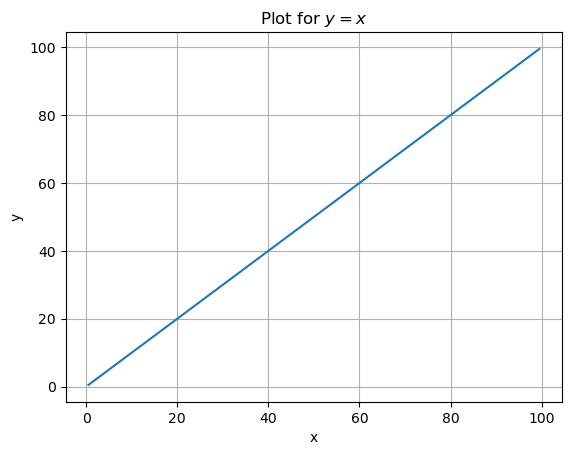

In [44]:
y=x
plt.ylabel("y")
plt.xlabel("x")
plt.title("Plot for $y=x$")
plt.grid()
plt.plot(x,y)

2. $y=x^2$

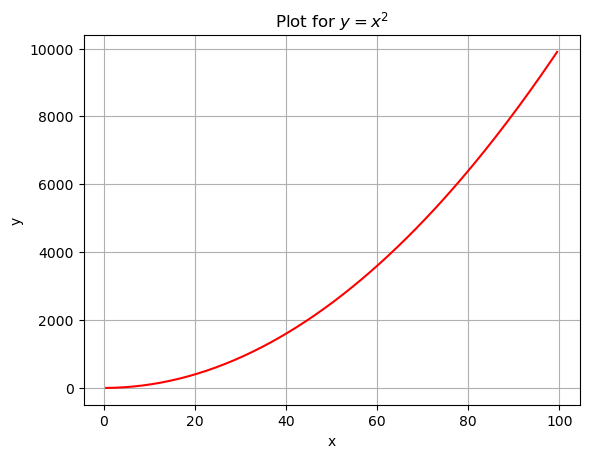

In [46]:
y2=x**2
plt.ylabel("y")
plt.xlabel("x")
plt.title("Plot for $y=x^2$")
plt.grid()
plt.plot(x,y2,color='red')

3. $y=\frac{x^3}{100}$

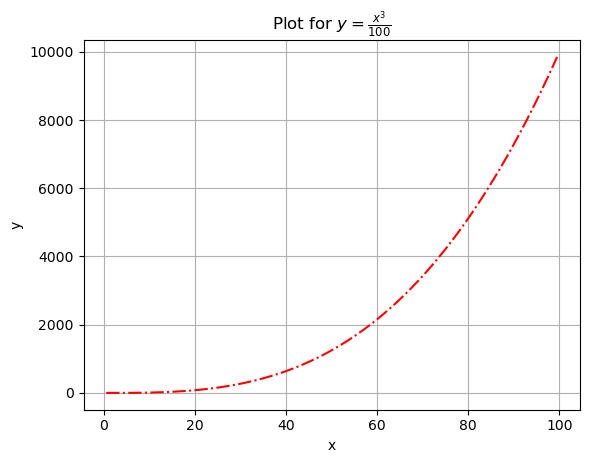

In [52]:
y3=x**3/100
plt.ylabel("y")
plt.xlabel("x")
plt.title(r"Plot for $y=\frac{x^3}{100}$")
plt.grid()
plt.plot(x,y3,color='red',linestyle='dashdot')

4. $y=\sin(x)$

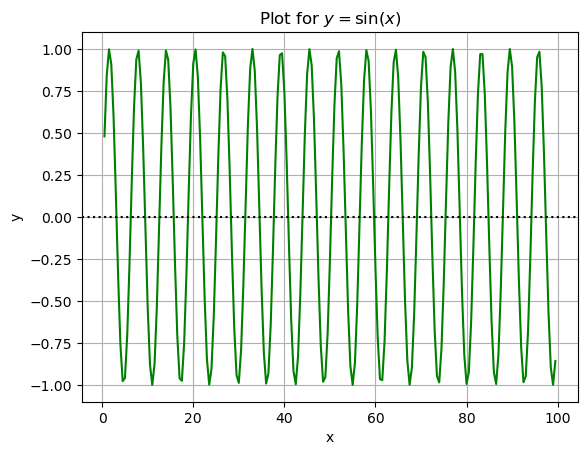

In [57]:
y4=np.sin(x)
plt.ylabel("y")
plt.xlabel("x")
plt.title(r"Plot for $y=\sin(x)$")
plt.grid()
plt.plot(x,y4,color='green')
plt.axhline(0,color='black',linestyle='dotted')

5. $y=\frac{\sin(x)}{x}$

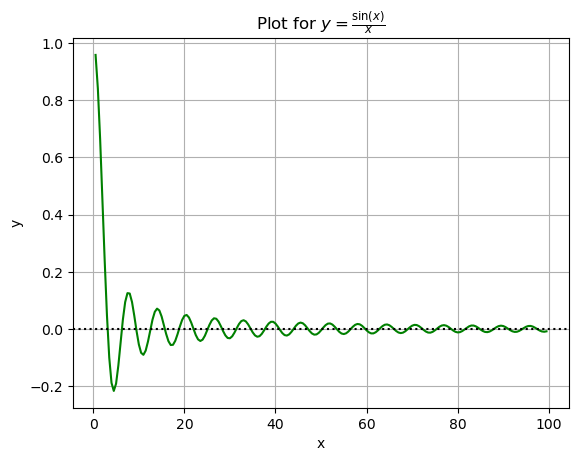

In [59]:
y5=np.sin(x)/x
plt.ylabel("y")
plt.xlabel("x")
plt.title(r"Plot for $y=\frac{\sin(x)}{x}$")
plt.grid()
plt.plot(x,y5,color='green')
plt.plot(x,)
plt.axhline(0,color='black',linestyle='dotted')

6. $y=\log(x)$

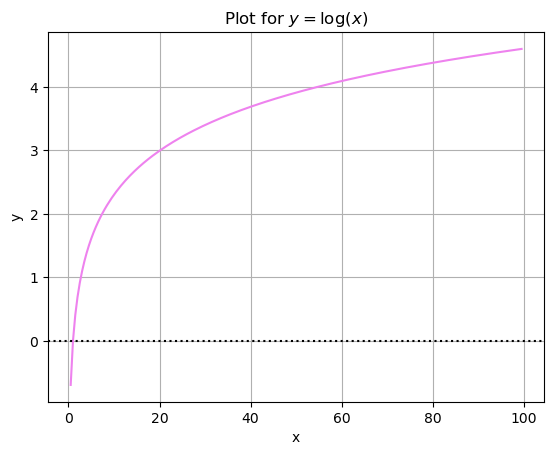

In [61]:
y6=np.log(x)
plt.ylabel("y")
plt.xlabel("x")
plt.title(r"Plot for $y=\log(x)$")
plt.grid()
plt.plot(x,y6,color='violet')
plt.axhline(0,color='black',linestyle='dotted')

7. $y=e^x$

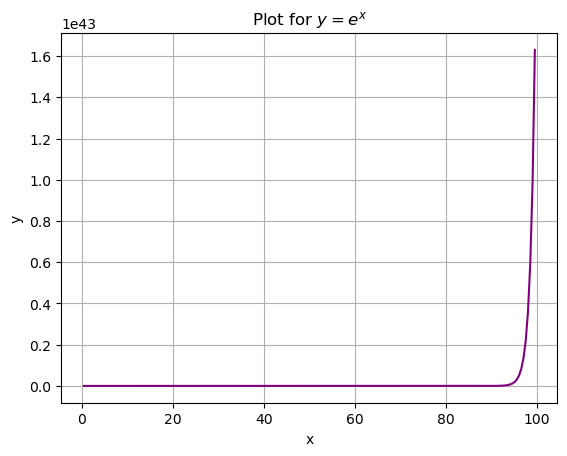

In [64]:
y7=np.exp(x)
plt.ylabel("y")
plt.xlabel("x")
plt.title(r"Plot for $y=e^x$")
plt.grid()
plt.plot(x,y7,color='purple')

**Q10. Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.** 

**Solution:**

In [75]:
# Creating a numpy array of 20*5
lin=np.random.uniform(1,2,100)
req_arr=lin.reshape(20,5)
req_arr

array([[1.8629574 , 1.07609722, 1.7163275 , 1.23858771, 1.31393908],
       [1.72508409, 1.92131133, 1.04235802, 1.75457607, 1.11068615],
       [1.61712983, 1.05074949, 1.94897756, 1.28373213, 1.09126499],
       [1.42010978, 1.00599697, 1.37409231, 1.33010346, 1.49457026],
       [1.64979313, 1.51559224, 1.58962163, 1.5568472 , 1.6649597 ],
       [1.58033346, 1.52692919, 1.79448472, 1.06795177, 1.75438745],
       [1.43974533, 1.10418228, 1.72148964, 1.89276447, 1.64632544],
       [1.0635296 , 1.91491491, 1.1254395 , 1.36337699, 1.92229285],
       [1.91889277, 1.12733553, 1.27459038, 1.59870986, 1.56789239],
       [1.61056021, 1.01013379, 1.9986918 , 1.20513848, 1.2329324 ],
       [1.09041854, 1.18535777, 1.85220459, 1.61237063, 1.28342717],
       [1.94745938, 1.8258281 , 1.45781269, 1.15222604, 1.99564544],
       [1.29894151, 1.25451304, 1.61390245, 1.25441065, 1.71333921],
       [1.88533836, 1.54902143, 1.92705414, 1.54321996, 1.50638171],
       [1.07897973, 1.07087613, 1.

In [76]:
# Creating a dataframe with "a"-"e" columns
import pandas as pd
dtf=pd.DataFrame(req_arr,columns=['a','b','c','d','e'])
dtf

,a,b,c,d,e
0,1.862957,1.076097,1.716328,1.238588,1.313939
1,1.725084,1.921311,1.042358,1.754576,1.110686
2,1.617130,1.050749,1.948978,1.283732,1.091265
3,1.420110,1.005997,1.374092,1.330103,1.494570
4,1.649793,1.515592,1.589622,1.556847,1.664960
5,1.580333,1.526929,1.794485,1.067952,1.754387
6,1.439745,1.104182,1.721490,1.892764,1.646325
7,1.063530,1.914915,1.125439,1.363377,1.922293
8,1.918893,1.127336,1.274590,1.598710,1.567892
9,1.610560,1.010134,1.998692,1.205138,1.232932


In [87]:
# Finding a column with highest standard deviation
sd={}
for col in dtf:
    sd[col]=np.std(dtf[col]) # storing the column names and their standard deviation in a dictionary
print(sd)
print("The column with max STD is:",max(sd,key=sd.get)) # getting the name of the col (key) having max std

{'a': 0.30245680855421775, 'b': 0.31632825296030675, 'c': 0.2861335474215411, 'd': 0.2271158491995591, 'e': 0.27925537613409435}
The column with max STD is: b


In [89]:
# Finding a row with lowest standard deviation
mn={}
for i in range(len(dtf)):
    mn[i]=np.mean(dtf.iloc[i]) # storing the row numbers and their means in a dictionary
print("The row number with min mean is:",min(mn,key=mn.get)) # getting the name of the col (key) having max std

The row number with min mean is: 14


**Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.** 

**Solution:**

In [98]:
#Creating "f" and "g" columns
dtf["f"]=dtf["a"]+dtf["b"]+dtf["c"]+dtf["d"]+dtf["e"]

for i in range(len(dtf)):
    if dtf.loc[i,"f"]<8:
        dtf.loc[i,"g"]="LT8"
    else:
        dtf.loc[i,"g"]="GT8"

In [110]:
# finding std of rows in "f" based on conditions
std1=np.std(dtf[dtf['g']=="LT8"].f)
std2=np.std(dtf[dtf['g']=="GT8"].f)
print("Respective Standard deviations of the rows of column 'f' when values of 'g' are LT8 and GT8:"+str(std1)+","+str(std2))

Respective Standard deviations of the rows of column 'f' when values of 'g' are LT8 and GT8:0.5313448117938326,0.016021974570553432


**Q12. Write a small piece of code to explain broadcasting in numpy.** 

**Solution:**
Broadcasting is one of the effective tools offered by Numpy to perform operations on the arrays of different shapes. Essentially, numpy stretches the smaller array to the larger array so that the said operations can be performed. For an example we can have two arrays of different shapes ($1\times3$,$2\times1$) as shown below, and do an operation(s) (Here,addition). After addition, the resultant matrix is of order $2\times3$ wherein every row is formed by adding the each element of second matrix to the every element of matrix 1. Similarily, scalar addition, multiplication, etc. is possible with broadcasting. However, matrix multiplication cannot be performed using broadcasting. <br>
**Note:** Broadcasting is possible only if the shapes of the arrays that are being broadcasted are compatible.

In [23]:
import numpy as np
d=np.array([1,2,3])
e=np.array([[4],[5]])
e+d

array([[5, 6, 7],
       [6, 7, 8]])

**Q13. Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.** 

**Solution:**

In [8]:
import numpy as np

def argmin(arr):
    p=np.where(arr==np.min(arr)) # finds the position of an element where it is the minimum value
    return p
    
ray=np.array([-2,3,1,0,5,-2])
g=argmin(ray)
print("Answer by custom function is:",g[0])
print("Answer by default function is:",np.argmin(ray))

Answer by custom function is: [0 5]
Answer by default function is: 0
